In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
sns.set(palette='magma')

In [2]:
dataset = pd.read_csv('Dataset3.csv')
dataset.shape

(42535, 36)

In [3]:
dataset.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_days,Credit_requirements,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,loan_status
0,2850,2850,2850.0,36 months,11.83%,94.44,B,B3,5,OWN,24000.0,Not Verified,347,Yes,debt_consolidation,33100,FL,24.70,0,6718,2,0,0,5,0,4184,38.70%,6,3228.32,3228.32,314,51.00,0,128,0,Charged Off
1,20000,20000,19950.0,60 months,17.14%,498.56,E,E3,10,MORTGAGE,48012.0,Verified,256,Yes,debt_consolidation,33100,FL,13.82,2,11528,0,13,0,13,0,14890,66.20%,36,29710.84,29636.67,283,498.56,0,128,0,Charged Off
2,6000,4500,0.0,36 months,15.70%,157.55,E,E5,1,MORTGAGE,42450.0,Not Verified,137,No,educational,66200,KS,23.89,0,112,12,58,0,15,0,5361,42.20%,19,4836.50,0.00,316,157.55,166,67,0,Charged Off
3,6400,6400,6150.0,60 months,10.59%,137.85,B,B2,10,MORTGAGE,37000.0,Not Verified,226,Yes,debt_consolidation,32100,FL,15.70,0,7630,0,0,0,9,0,8254,48.10%,17,7306.05,7019.34,39,137.85,0,67,0,Charged Off
4,1200,1200,1200.0,36 months,13.85%,40.93,C,C4,5,OWN,60000.0,Not Verified,316,Yes,other,17600,PA,3.08,0,17,3,0,0,3,0,2823,65.70%,8,501.76,501.76,75,40.93,0,67,0,Charged Off


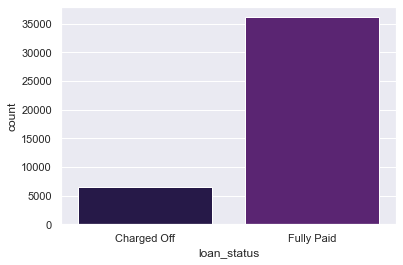

In [4]:
sns.countplot(data=dataset, x='loan_status')
plt.show()

In [5]:
dataset['loan_status'].value_counts()

Fully Paid     36104
Charged Off     6431
Name: loan_status, dtype: int64

Note: The data is imbalanced

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               42535 non-null  int64  
 1   funded_amnt             42535 non-null  int64  
 2   funded_amnt_inv         42535 non-null  float64
 3   term                    42535 non-null  object 
 4   int_rate                42535 non-null  object 
 5   installment             42535 non-null  float64
 6   grade                   42535 non-null  object 
 7   sub_grade               42535 non-null  object 
 8   emp_length              42535 non-null  int64  
 9   home_ownership          42535 non-null  object 
 10  annual_inc              42531 non-null  float64
 11  verification_status     42535 non-null  object 
 12  issue_days              42535 non-null  int64  
 13  Credit_requirements     42535 non-null  object 
 14  purpose                 42535 non-null

In [7]:
dataset.isnull().sum()

loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                4
verification_status       0
issue_days                0
Credit_requirements       0
purpose                   0
zip_code                  0
addr_state                0
dti                       0
delinq_2yrs               0
earliest_cr_line          0
inq_last_6mths            0
mths_since_last_delinq    0
mths_since_last_record    0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
total_pymnt               0
total_pymnt_inv           0
last_pymnt_d              0
last_pymnt_amnt           0
next_pymnt_d              0
last_credit_pull_d        0
pub_rec_bankruptcies      0
loan_status         

In [8]:
#There were only 4 missing values in the annual_inc column so i dropped them 
dataset.dropna(axis=0, inplace=True)
dataset.isnull().any().sum()

0

In [9]:
dataset.isnull().any().any()

False

In [10]:
#Label Encoding loan_status to loan_status_labeled for EDA purposes
dataset['loan_status_labeled'] = dataset['loan_status'].map({'Fully Paid': 0,
                                                             'Charged Off': 1})

Specifying numerical and categorical columns to analyze each 

In [11]:
numerical_cols = [col for col in dataset.columns if dataset[col].dtype in ['int64','float64']]
numerical_cols

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'emp_length',
 'annual_inc',
 'issue_days',
 'zip_code',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'pub_rec_bankruptcies',
 'loan_status_labeled']

In [12]:
categorical_cols = [col for col in dataset.columns if dataset[col].dtype == 'object']
categorical_cols

['term',
 'int_rate',
 'grade',
 'sub_grade',
 'home_ownership',
 'verification_status',
 'Credit_requirements',
 'purpose',
 'addr_state',
 'revol_util',
 'loan_status']

In [13]:
#int_rate had object dtype
dataset['int_rate'].head(1)

0    11.83%
Name: int_rate, dtype: object

In [14]:
#Removnig '%' from the int_rate column
dataset['int_rate'] = dataset['int_rate'].apply(lambda x: x.replace('%', ''))
dataset['int_rate'].value_counts()

10.99    970
11.49    837
13.49    832
7.51     787
7.88     742
        ... 
17.41      1
24.59      1
17.46      1
16.83      1
17.72      1
Name: int_rate, Length: 394, dtype: int64

In [15]:
#revol_util had % same as int_rate and object dtype 
dataset['revol_util'].head(1)

0    38.70%
Name: revol_util, dtype: object

In [16]:
#Removing the '%' from revol_util column
dataset['revol_util'] = dataset['revol_util'].apply(lambda x: x.replace('%', ''))
dataset['revol_util'].head(1)

0    38.70
Name: revol_util, dtype: object

Changing the dtype of int_rate and revol_util to float64

In [17]:
dataset['int_rate'] = dataset['int_rate'].astype('float64')
dataset['int_rate'].head(1)

0    11.83
Name: int_rate, dtype: float64

In [18]:
dataset['revol_util'] = dataset['revol_util'].astype('float64')
dataset['revol_util'].dtype

dtype('float64')

In [19]:
#Updating numerical and categorical columns
numerical_cols = [col for col in dataset.columns if dataset[col].dtype in ['int64','float64']]
print('Numerical Columns:', numerical_cols)
categorical_cols = [col for col in dataset.columns if dataset[col].dtype == 'object']
print('Categorical Columns:', categorical_cols)

Numerical Columns: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'issue_days', 'zip_code', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'total_pymnt', 'total_pymnt_inv', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'pub_rec_bankruptcies', 'loan_status_labeled']
Categorical Columns: ['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'Credit_requirements', 'purpose', 'addr_state', 'loan_status']


# Categorical Columns EDA

<Figure size 576x288 with 0 Axes>

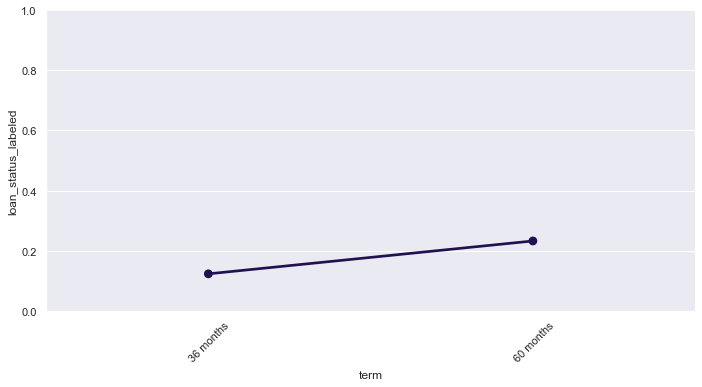

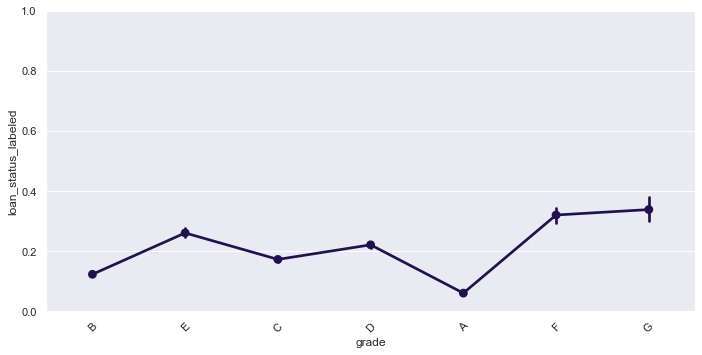

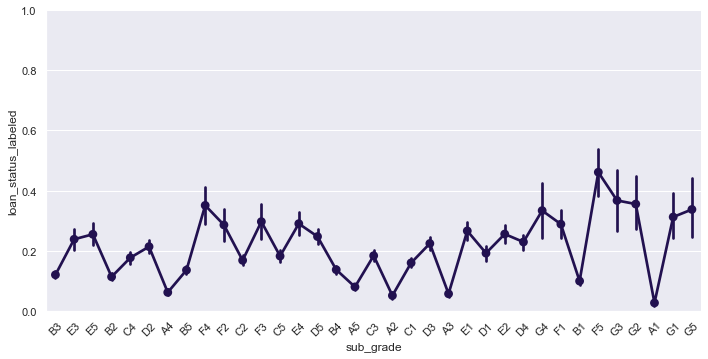

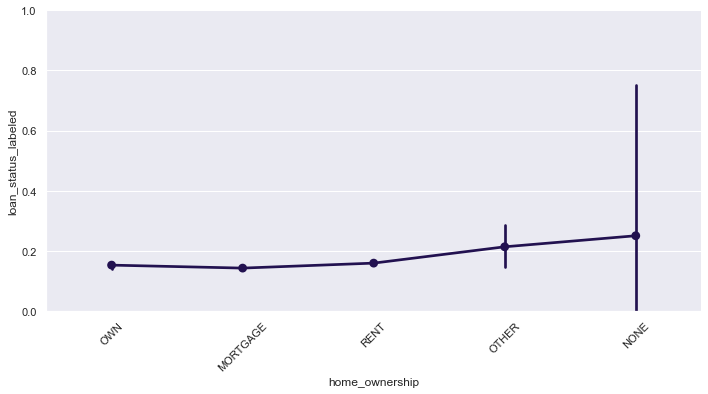

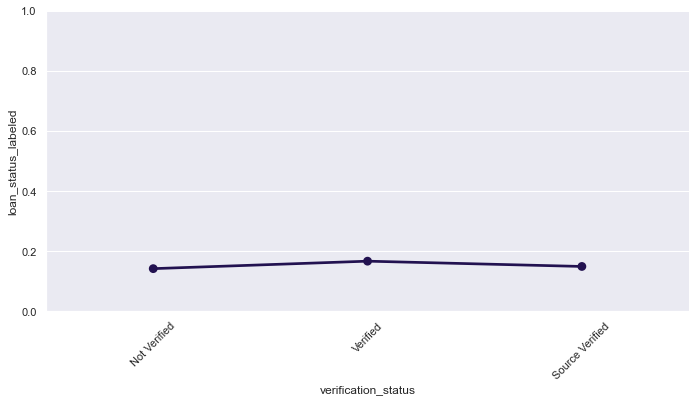

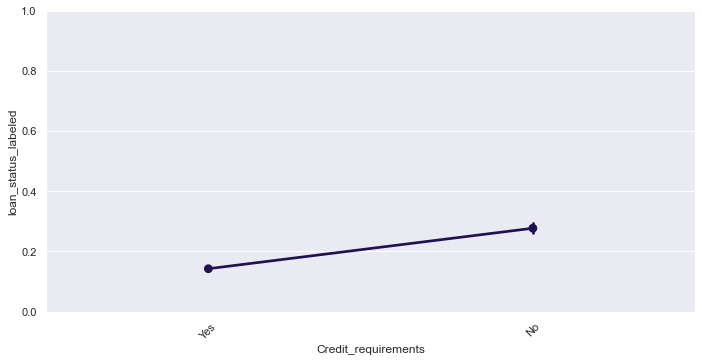

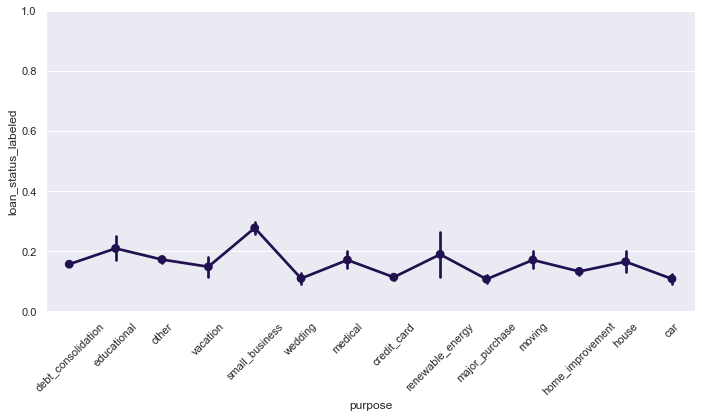

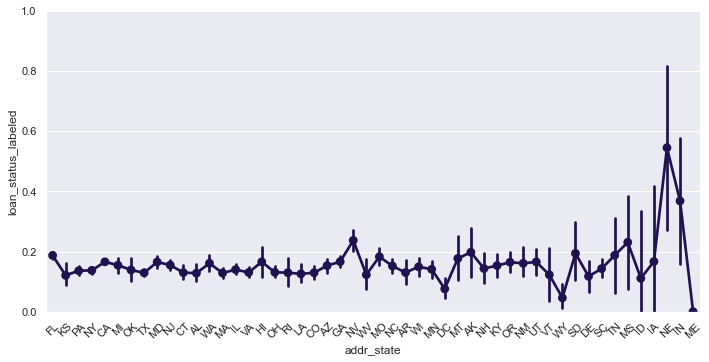

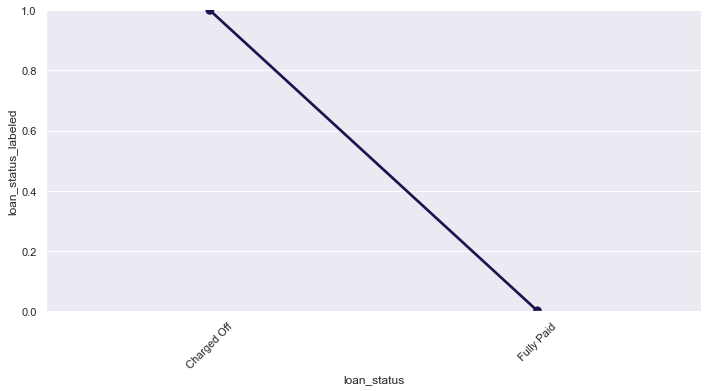

In [20]:
#Categorical plots for categorical features
plt.figure(figsize=(8,4))
for col in categorical_cols:
    sns.catplot(x=col, y='loan_status_labeled', data=dataset, kind='point', aspect=2)
    plt.xticks(rotation=45)
    plt.ylim(0, 1)  #Ylim makes the y axis Min->0 and Max->1  #Comment the ylim if you want to see the exact values on the y-axis

# Insights from the CatPlots:

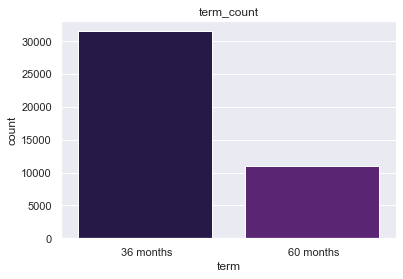

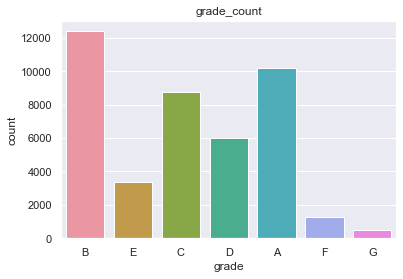

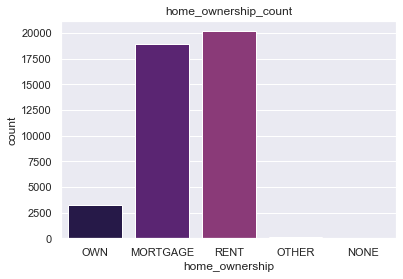

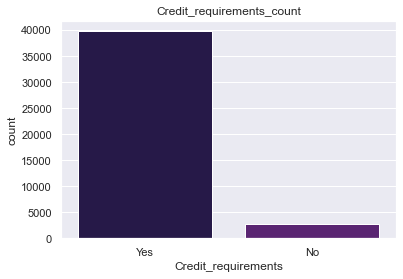

In [21]:
for i in ['term','grade','home_ownership','Credit_requirements']:
    sns.countplot(x=i, data=dataset, )
    plt.title(i+'_count')
    plt.show()

# Numerical Columns EDA

In [22]:
dataset[numerical_cols].describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,issue_days,zip_code,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,loan_status_labeled
count,42531.000000,42531.000000,42531.000000,42531.000000,42531.000000,42531.000000,4.253100e+04,42531.000000,42531.000000,42531.000000,42531.000000,42531.000000,42531.000000,42531.000000,42531.000000,42531.000000,42531.000000,4.253100e+04,42531.000000,42531.000000,42531.000000,42531.000000,42531.00000,42531.00000,42531.000000,42531.000000,42531.000000,42531.000000
mean,11090.173050,10822.011004,10140.582662,12.165424,322.634879,4.913757,6.913656e+04,161.110390,49996.762362,13.374136,0.152359,6433.279984,1.080788,12.851567,5.079824,9.338459,0.058122,1.429921e+04,49.017838,22.111401,12020.729210,11313.521348,177.37622,2613.47279,11.481155,146.006231,0.043780,0.151207
std,7411.137529,7147.112309,7131.587121,3.707870,208.933353,3.461547,6.409635e+04,103.855489,32847.121955,6.725675,0.512269,4452.745388,1.527231,21.663753,21.576802,4.500654,0.245645,2.201904e+04,28.421357,11.601803,9095.034146,9038.631127,105.49909,4385.21018,51.531992,99.513685,0.205525,0.358255
min,500.000000,500.000000,0.000000,5.420000,15.670000,0.000000,1.896000e+03,12.000000,700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,5200.000000,5000.000000,4950.000000,9.630000,165.520000,2.000000,4.000000e+04,73.000000,20000.000000,8.200000,0.000000,319.000000,0.000000,0.000000,0.000000,6.000000,0.000000,3.636500e+03,25.600000,13.000000,5464.404073,4793.310000,75.00000,211.09000,0.000000,67.000000,0.000000,0.000000
50%,9700.000000,9600.000000,8500.000000,11.990000,277.710000,4.000000,5.900000e+04,165.000000,44600.000000,13.470000,0.000000,7541.000000,1.000000,0.000000,0.000000,9.000000,0.000000,8.823000e+03,49.600000,20.000000,9683.424655,8956.580000,167.00000,528.58000,0.000000,102.000000,0.000000,0.000000
75%,15000.000000,15000.000000,14000.000000,14.720000,428.275000,9.000000,8.250000e+04,256.000000,85000.000000,18.680000,0.000000,9153.000000,2.000000,21.000000,0.000000,12.000000,0.000000,1.725250e+04,72.600000,29.000000,16428.176695,15544.950000,283.00000,3170.38500,0.000000,225.000000,0.000000,0.000000
max,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,10.000000,6.000000e+06,349.000000,99900.000000,29.990000,13.000000,26654.000000,33.000000,120.000000,129.000000,47.000000,5.000000,1.207359e+06,119.000000,90.000000,58886.473430,58563.680000,350.00000,36115.20000,350.000000,350.000000,2.000000,1.000000


Theres some outliers in the data.

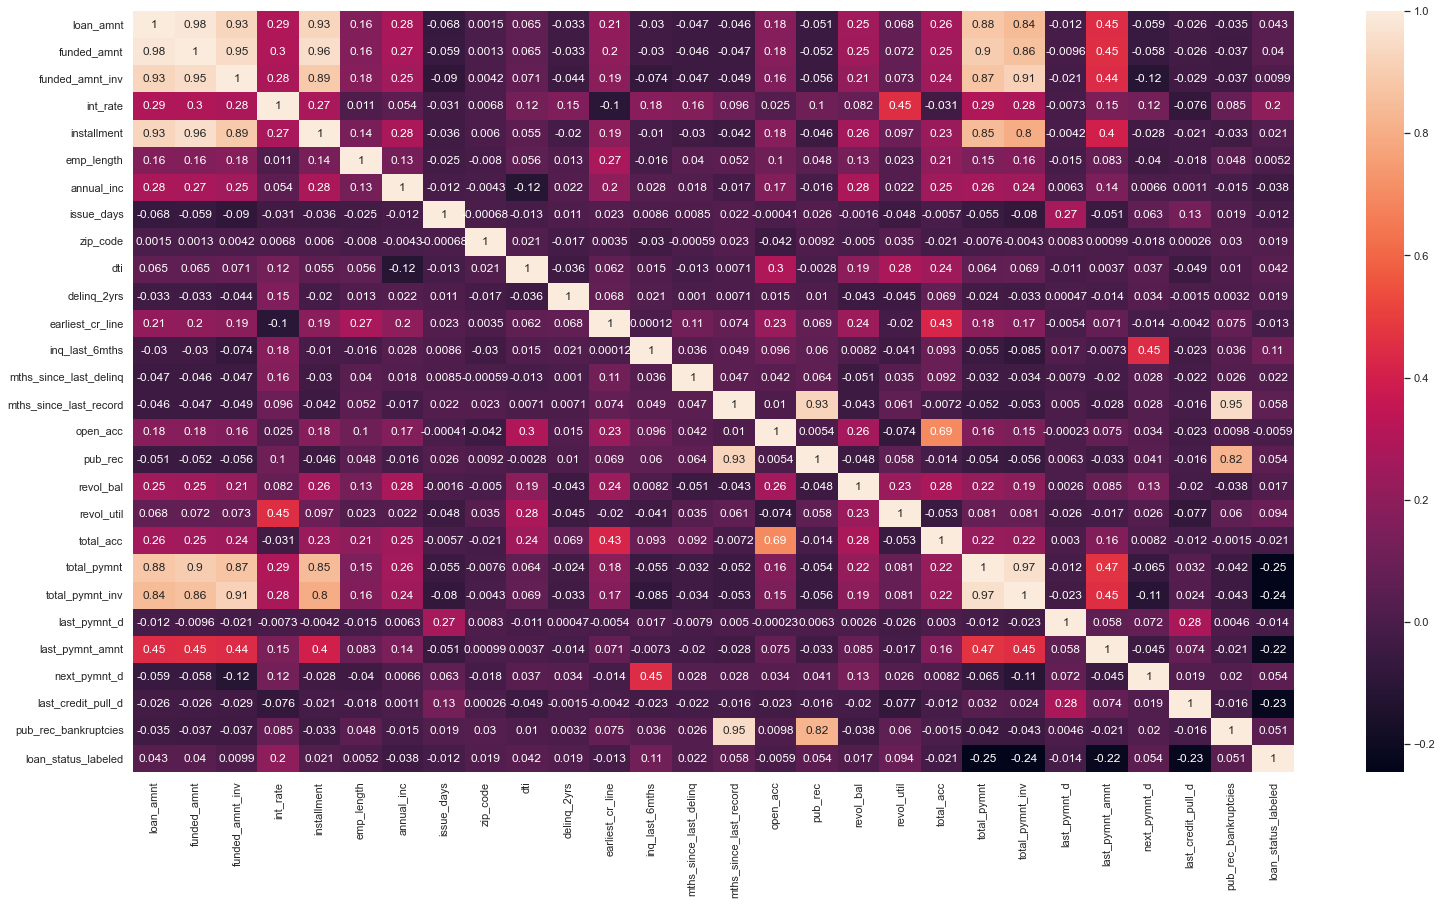

In [23]:
#Correlation Heatmap
plt.figure(figsize=(26,14))
sns.heatmap(dataset[numerical_cols].corr(), annot=True) #annot=True
plt.show()

# Preprocesssing

In [24]:
dataset_clean = dataset.drop(['zip_code','emp_length','addr_state','loan_status'], axis=1)
dataset_clean.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_days,Credit_requirements,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies,loan_status_labeled
0,2850,2850,2850.0,36 months,11.83,94.44,B,B3,OWN,24000.0,Not Verified,347,Yes,debt_consolidation,24.70,0,6718,2,0,0,5,0,4184,38.7,6,3228.32,3228.32,314,51.00,0,128,0,1
1,20000,20000,19950.0,60 months,17.14,498.56,E,E3,MORTGAGE,48012.0,Verified,256,Yes,debt_consolidation,13.82,2,11528,0,13,0,13,0,14890,66.2,36,29710.84,29636.67,283,498.56,0,128,0,1
2,6000,4500,0.0,36 months,15.70,157.55,E,E5,MORTGAGE,42450.0,Not Verified,137,No,educational,23.89,0,112,12,58,0,15,0,5361,42.2,19,4836.50,0.00,316,157.55,166,67,0,1
3,6400,6400,6150.0,60 months,10.59,137.85,B,B2,MORTGAGE,37000.0,Not Verified,226,Yes,debt_consolidation,15.70,0,7630,0,0,0,9,0,8254,48.1,17,7306.05,7019.34,39,137.85,0,67,0,1
4,1200,1200,1200.0,36 months,13.85,40.93,C,C4,OWN,60000.0,Not Verified,316,Yes,other,3.08,0,17,3,0,0,3,0,2823,65.7,8,501.76,501.76,75,40.93,0,67,0,1


In [25]:
X = dataset_clean.drop(['loan_status_labeled'], axis=1)
y = dataset['loan_status_labeled']

X.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_days,Credit_requirements,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,2850,2850,2850.0,36 months,11.83,94.44,B,B3,OWN,24000.0,Not Verified,347,Yes,debt_consolidation,24.70,0,6718,2,0,0,5,0,4184,38.7,6,3228.32,3228.32,314,51.00,0,128,0
1,20000,20000,19950.0,60 months,17.14,498.56,E,E3,MORTGAGE,48012.0,Verified,256,Yes,debt_consolidation,13.82,2,11528,0,13,0,13,0,14890,66.2,36,29710.84,29636.67,283,498.56,0,128,0
2,6000,4500,0.0,36 months,15.70,157.55,E,E5,MORTGAGE,42450.0,Not Verified,137,No,educational,23.89,0,112,12,58,0,15,0,5361,42.2,19,4836.50,0.00,316,157.55,166,67,0
3,6400,6400,6150.0,60 months,10.59,137.85,B,B2,MORTGAGE,37000.0,Not Verified,226,Yes,debt_consolidation,15.70,0,7630,0,0,0,9,0,8254,48.1,17,7306.05,7019.34,39,137.85,0,67,0
4,1200,1200,1200.0,36 months,13.85,40.93,C,C4,OWN,60000.0,Not Verified,316,Yes,other,3.08,0,17,3,0,0,3,0,2823,65.7,8,501.76,501.76,75,40.93,0,67,0


In [26]:
y.shape

(42531,)

In [27]:
#Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print('X_train shape:',X_train.shape)
print('X_test shape:',X_test.shape)

X_train shape: (34024, 32)
X_test shape: (8507, 32)


In [28]:
X_train.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_days,Credit_requirements,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
41169,35000,35000,33951.84413,60 months,20.89,944.71,F,F1,MORTGAGE,160000.0,Verified,42,Yes,debt_consolidation,12.11,0,7145,1,0,88,13,2,34165,91.4,21,56681.88585,54132.56,38,943.99,0,67,2
6012,16000,16000,14864.69006,36 months,5.79,485.24,A,A2,MORTGAGE,95004.0,Source Verified,74,Yes,other,15.51,0,10067,1,0,0,7,0,4619,27.5,18,17364.93173,16037.44,314,4766.10,0,284,0
31115,21000,21000,20950.00000,36 months,11.99,697.41,B,B5,MORTGAGE,175000.0,Source Verified,134,Yes,major_purchase,10.99,3,7296,2,8,0,9,0,5438,40.0,20,25085.71686,25025.99,193,2072.89,0,67,0
34992,14000,14000,13950.00000,36 months,9.63,449.32,B,B1,MORTGAGE,112000.0,Source Verified,315,Yes,credit_card,8.42,0,14023,0,36,0,10,0,19783,33.2,24,16133.15156,16075.53,11,331.17,0,67,0
36891,17200,17200,17200.00000,60 months,20.89,464.26,F,F1,RENT,52000.0,Verified,12,Yes,house,7.06,0,19,0,0,0,5,0,8190,96.4,6,27885.22002,27885.22,8,920.52,0,38,0


In [29]:
#loan_amnt/funded_amnt/funded_amnt_inv had super high correlation >93% for all
#Maybe combine them to 1 feature using PCA?
pass

In [30]:
threshold = 0.80    #correlation threshhold
correlated_features = set()
correlation_matrix = X_train.corr()
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[j, i]) >= threshold:
            colname = correlation_matrix.columns[i]
            correlated_features.add(colname)
            
len(correlated_features)

7

In [31]:
correlated_features

{'funded_amnt',
 'funded_amnt_inv',
 'installment',
 'pub_rec',
 'pub_rec_bankruptcies',
 'total_pymnt',
 'total_pymnt_inv'}

In [32]:
#Number of columns in the dataset, with correlation value of greater than 0.8 with at least 1 other column
print(correlated_features)

{'funded_amnt', 'total_pymnt', 'installment', 'pub_rec', 'pub_rec_bankruptcies', 'funded_amnt_inv', 'total_pymnt_inv'}


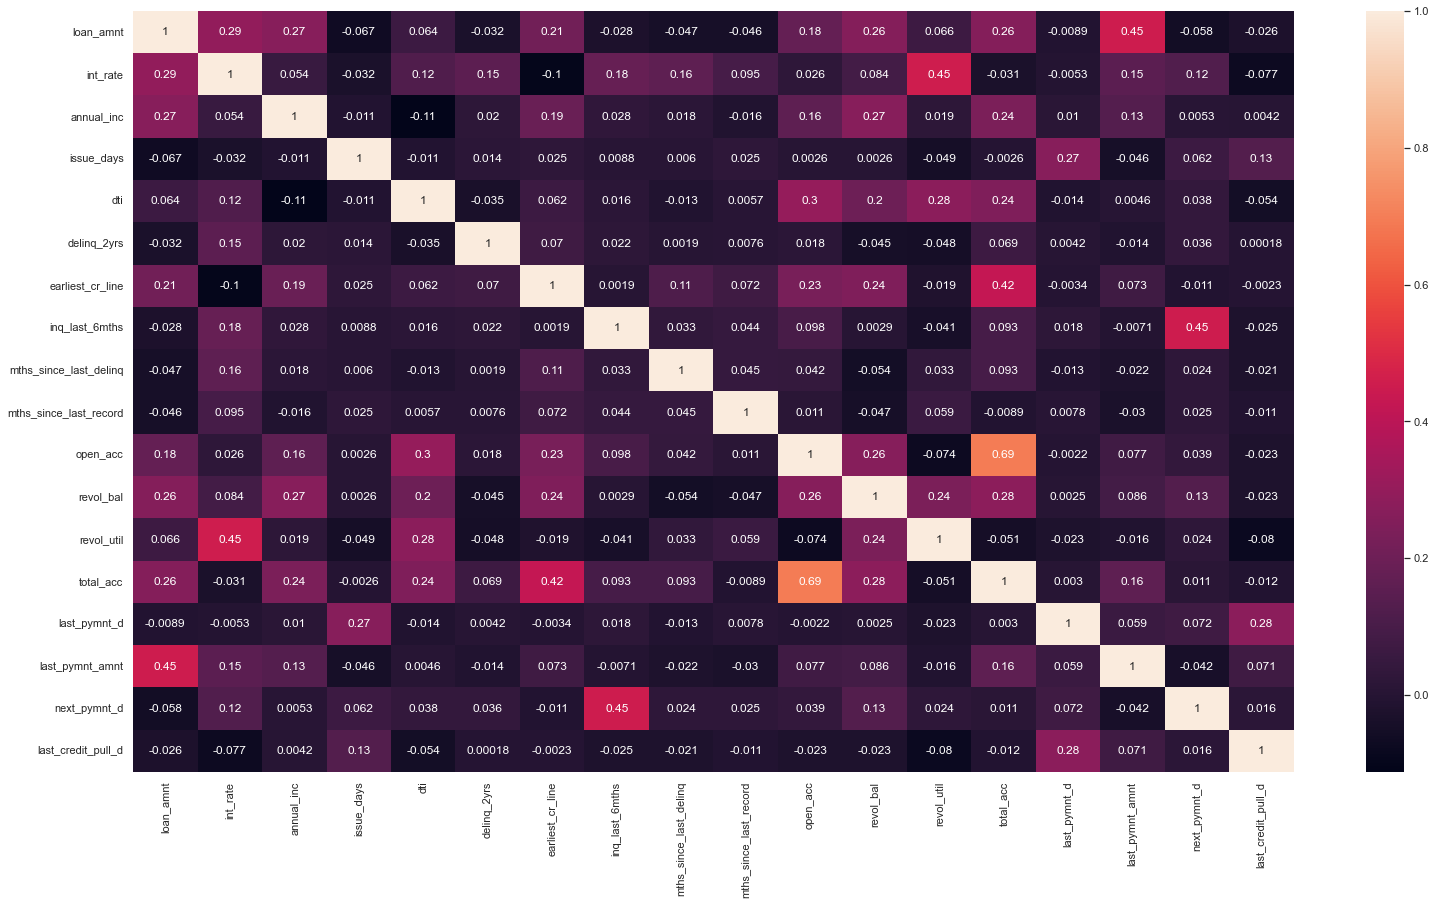

In [33]:
X_train_clean = X_train.drop(correlated_features, axis=1)
plt.figure(figsize=(26,14))
sns.heatmap(X_train_clean.corr(), annot=True) #annot=True
plt.show()

In [34]:
X_train_clean.shape

(34024, 25)

In [35]:
categorical_cols = [col for col in X_train_clean.columns if X_train_clean[col].dtype == 'object']
numerical_cols =[col for col in X_train_clean.columns if X_train_clean[col].dtype in ['int64','float64']]

In [36]:
X_train_clean[categorical_cols].head()

,term,grade,sub_grade,home_ownership,verification_status,Credit_requirements,purpose
41169,60 months,F,F1,MORTGAGE,Verified,Yes,debt_consolidation
6012,36 months,A,A2,MORTGAGE,Source Verified,Yes,other
31115,36 months,B,B5,MORTGAGE,Source Verified,Yes,major_purchase
34992,36 months,B,B1,MORTGAGE,Source Verified,Yes,credit_card
36891,60 months,F,F1,RENT,Verified,Yes,house


In [37]:
#Drop subgrade since grade is more generalized (Maybe better?!?!)
X_train_clean.drop('sub_grade', axis=1, inplace=True)
categorical_cols = [col for col in X_train_clean.columns if X_train_clean[col].dtype == 'object']

In [38]:
#I've tried to map the term to 0's and 1's but it resulted in NANs so i used strip() to remove outer spaces
X_train_clean['term'] = X_train_clean['term'].apply(lambda x: x.strip())
X_train_clean['term']

41169    60 months
6012     36 months
31115    36 months
34992    36 months
36891    60 months
           ...    
41993    36 months
32103    36 months
30403    36 months
21243    60 months
2732     36 months
Name: term, Length: 34024, dtype: object

In [39]:
X_train_clean['home_ownership'].value_counts()

RENT        16179
MORTGAGE    15136
OWN          2598
OTHER         108
NONE            3
Name: home_ownership, dtype: int64

In [40]:
X_train_clean['term_label'] = X_train_clean['term'].map({'36 months': 0, '60 months': 1})
X_train_clean['grade_label'] = X_train_clean['grade'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6})
X_train_clean['home_ownership_label'] = X_train_clean['home_ownership'].replace(['RENT','MORTGAGE','OWN'],0)
X_train_clean['home_ownership_label'] = X_train_clean['home_ownership_label'].replace(['OTHER','NONE'],1)
X_train_clean['verification_status_label'] = X_train_clean['verification_status'].map({'Not Verified':0, 'Source Verified':1, 'Verified':2})
X_train_clean['Credit_requirements_label'] = X_train_clean['Credit_requirements'].map({'No': 0, 'Yes':1})

X_train_clean['purpose_label'] = X_train_clean['purpose'].replace(['small_business','educational','renewable_energy'],0)
X_train_clean['purpose_label'] = X_train_clean['purpose_label'].replace(['other','moving','medical','house','debt_consolidation'],1)
X_train_clean['purpose_label'] = X_train_clean['purpose_label'].replace(['vacation','home_improvement','credit_card','wedding','car','major_purchase'],2)

In [41]:
#small_business and educationalpurposes had slightly higher chance of being Charged Off
dataset.groupby('purpose')['loan_status_labeled'].mean().sort_values(ascending=False)

purpose
small_business        0.276606
educational           0.208531
renewable_energy      0.188679
other                 0.171454
moving                0.170111
medical               0.169987
house                 0.164319
debt_consolidation    0.155947
vacation              0.147500
home_improvement      0.131916
credit_card           0.112653
wedding               0.108566
car                   0.107121
major_purchase        0.106015
Name: loan_status_labeled, dtype: float64

In [42]:
X_train_clean['purpose'].value_counts()

debt_consolidation    15882
credit_card            4428
other                  3532
home_improvement       2522
major_purchase         1842
small_business         1571
car                    1274
wedding                 782
medical                 612
moving                  511
educational             340
house                   324
vacation                321
renewable_energy         83
Name: purpose, dtype: int64

In [43]:
X_train_clean['purpose_label'].value_counts()

1    20861
2    11169
0     1994
Name: purpose_label, dtype: int64

In [44]:
for i in ['term_label','grade_label','home_ownership_label','verification_status_label','Credit_requirements_label','purpose_label']:
    categorical_cols.append(i)

In [45]:
X_train_clean[categorical_cols].head()

,term,grade,home_ownership,verification_status,Credit_requirements,purpose,term_label,grade_label,home_ownership_label,verification_status_label,Credit_requirements_label,purpose_label
41169,60 months,F,MORTGAGE,Verified,Yes,debt_consolidation,1,5,0,2,1,1
6012,36 months,A,MORTGAGE,Source Verified,Yes,other,0,0,0,1,1,1
31115,36 months,B,MORTGAGE,Source Verified,Yes,major_purchase,0,1,0,1,1,2
34992,36 months,B,MORTGAGE,Source Verified,Yes,credit_card,0,1,0,1,1,2
36891,60 months,F,RENT,Verified,Yes,house,1,5,0,2,1,1


In [46]:
categorical_cols = ['term_label','grade_label','home_ownership_label','verification_status_label','Credit_requirements_label','purpose_label']

In [47]:
#Dropping Unencoded columns
print(X_train_clean.shape)
X_train_clean.drop(['term','grade','home_ownership','verification_status','Credit_requirements','purpose'], axis=1, inplace=True)
print(X_train_clean.shape)

(34024, 30)
(34024, 24)


In [48]:
X_train_clean.head()

,loan_amnt,int_rate,annual_inc,issue_days,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,term_label,grade_label,home_ownership_label,verification_status_label,Credit_requirements_label,purpose_label
41169,35000,20.89,160000.0,42,12.11,0,7145,1,0,88,13,34165,91.4,21,38,943.99,0,67,1,5,0,2,1,1
6012,16000,5.79,95004.0,74,15.51,0,10067,1,0,0,7,4619,27.5,18,314,4766.10,0,284,0,0,0,1,1,1
31115,21000,11.99,175000.0,134,10.99,3,7296,2,8,0,9,5438,40.0,20,193,2072.89,0,67,0,1,0,1,1,2
34992,14000,9.63,112000.0,315,8.42,0,14023,0,36,0,10,19783,33.2,24,11,331.17,0,67,0,1,0,1,1,2
36891,17200,20.89,52000.0,12,7.06,0,19,0,0,0,5,8190,96.4,6,8,920.52,0,38,1,5,0,2,1,1


In [49]:
X_train_clean[numerical_cols].head()

,loan_amnt,int_rate,annual_inc,issue_days,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
41169,35000,20.89,160000.0,42,12.11,0,7145,1,0,88,13,34165,91.4,21,38,943.99,0,67
6012,16000,5.79,95004.0,74,15.51,0,10067,1,0,0,7,4619,27.5,18,314,4766.10,0,284
31115,21000,11.99,175000.0,134,10.99,3,7296,2,8,0,9,5438,40.0,20,193,2072.89,0,67
34992,14000,9.63,112000.0,315,8.42,0,14023,0,36,0,10,19783,33.2,24,11,331.17,0,67
36891,17200,20.89,52000.0,12,7.06,0,19,0,0,0,5,8190,96.4,6,8,920.52,0,38


In [50]:
#The data had outliers so i used Robust Scaler to scale the data 
#What Robust scaler does is it ignores outliers during the calculation of the mean and std then uses the calculated values to scale the variable
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()
X_train_clean[numerical_cols] = rb.fit_transform(X_train_clean[numerical_cols])
X_train_clean[numerical_cols].head()

,loan_amnt,int_rate,annual_inc,issue_days,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d
41169,2.571429,1.748527,2.404762,-0.672131,-0.130197,0.0,-0.044670,0.0,0.000000,88.0,0.666667,1.880495,0.889362,0.0625,-0.615385,0.139870,0.0,-0.221519
6012,0.632653,-1.218075,0.857238,-0.497268,0.192920,0.0,0.284941,0.0,0.000000,0.0,-0.333333,-0.310573,-0.470213,-0.1250,0.711538,1.426708,0.0,1.151899
31115,1.142857,0.000000,2.761905,-0.169399,-0.236636,3.0,-0.027637,0.5,0.380952,0.0,0.000000,-0.249838,-0.204255,0.0000,0.129808,0.519951,0.0,-0.221519
34992,0.428571,-0.463654,1.261905,0.819672,-0.480874,0.0,0.731190,-0.5,1.714286,0.0,0.166667,0.813957,-0.348936,0.2500,-0.745192,-0.066456,0.0,-0.221519
36891,0.755102,1.748527,-0.166667,-0.836066,-0.610121,0.0,-0.848505,-0.5,0.000000,0.0,-0.666667,-0.045755,0.995745,-0.8750,-0.759615,0.131968,0.0,-0.405063


# ANN based on the top 5 features + SMOTE

In [51]:
selected_features5 = ['last_credit_pull_d','last_pymnt_amnt','last_pymnt_d','int_rate','issue_days']

X_train_clean_top_5_features = X_train_clean[selected_features5]
X_train_clean_top_5_features.head()

,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,int_rate,issue_days
41169,-0.221519,0.139870,-0.615385,1.748527,-0.672131
6012,1.151899,1.426708,0.711538,-1.218075,-0.497268
31115,-0.221519,0.519951,0.129808,0.000000,-0.169399
34992,-0.221519,-0.066456,-0.745192,-0.463654,0.819672
36891,-0.405063,0.131968,-0.759615,1.748527,-0.836066


In [52]:
#Fitting a baseline model to figure out feature importances
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

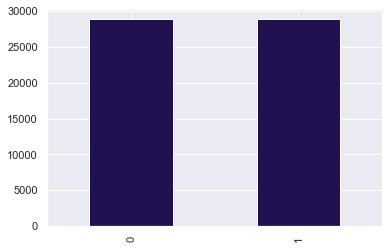

In [53]:
#Using SMOTE to balance the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_ros, y_ros = smote.fit_resample(X_train_clean_top_5_features, y_train)
ros_chd_plot=y_ros.value_counts().plot(kind='bar')
plt.show()

In [54]:
X_ros.head(1)

,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,int_rate,issue_days
0,-0.221519,0.13987,-0.615385,1.748527,-0.672131


In [55]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    for mean, params in zip(means, results.cv_results_['params']):
        print('{} for {}'.format(round(mean, 3), params))

### Preprocessing the Test Data

In [56]:
X_test.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,issue_days,Credit_requirements,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
19983,1500,1500,1500.00000,36 months,18.79,54.83,E,E3,RENT,24000.0,Not Verified,103,Yes,other,18.65,0,81,0,55,0,4,0,2893,99.8,10,1973.635756,1973.64,101,57.91,0,101,0
882,10000,10000,10000.00000,36 months,9.63,320.94,B,B1,RENT,43000.0,Not Verified,346,Yes,credit_card,10.72,0,8332,3,0,0,12,0,11497,67.2,29,11090.718200,11090.72,165,5967.01,0,343,0
27800,35000,35000,34929.06898,60 months,12.68,790.64,C,C1,MORTGAGE,82000.0,Verified,256,Yes,small_business,8.60,0,12197,1,0,0,10,0,11294,65.0,23,15812.800000,15679.53,345,790.64,0,67,0
2005,1000,1000,950.00000,36 months,11.14,32.81,B,B1,RENT,7200.0,Not Verified,347,Yes,educational,9.50,0,8332,2,0,0,5,0,1552,9.1,7,1009.490000,959.02,317,1009.58,0,317,0
1136,25000,25000,24725.00000,60 months,11.49,549.69,B,B4,MORTGAGE,47500.0,Verified,134,Yes,debt_consolidation,14.12,0,10249,0,0,0,14,0,28943,34.8,28,29535.126000,29210.24,164,18014.61,0,342,0


In [57]:
X_test_clean = X_test.drop(correlated_features, axis=1)
X_test_clean.shape

(8507, 25)

In [58]:
X_test_clean.drop('sub_grade', axis=1, inplace=True)
X_test_clean.shape

(8507, 24)

In [59]:
X_test_clean['term'] = X_test_clean['term'].apply(lambda x: x.strip())
X_test_clean['term_label'] = X_test_clean['term'].map({'36 months': 0, '60 months': 1})
X_test_clean['grade_label'] = X_test_clean['grade'].map({'A':0, 'B':1, 'C':2, 'D':3, 'E':4, 'F':5, 'G':6})
X_test_clean['home_ownership_label'] = X_test_clean['home_ownership'].replace(['RENT','MORTGAGE','OWN'],0)
X_test_clean['home_ownership_label'] = X_test_clean['home_ownership_label'].replace(['OTHER','NONE'],1)
X_test_clean['verification_status_label'] = X_test_clean['verification_status'].map({'Not Verified':0, 'Source Verified':1, 'Verified':2})
X_test_clean['Credit_requirements_label'] = X_test_clean['Credit_requirements'].map({'No': 0, 'Yes':1})

X_test_clean['purpose_label'] = X_test_clean['purpose'].replace(['small_business','educational','renewable_energy'],0)
X_test_clean['purpose_label'] = X_test_clean['purpose_label'].replace(['other','moving','medical','house','debt_consolidation'],1)
X_test_clean['purpose_label'] = X_test_clean['purpose_label'].replace(['vacation','home_improvement','credit_card','wedding','car','major_purchase'],2)

In [60]:
#Dropping Unencoded columns
print(X_test_clean.shape)
X_test_clean.drop(['term','grade','home_ownership','verification_status','Credit_requirements','purpose'], axis=1, inplace=True)
print(X_test_clean.shape)

(8507, 30)
(8507, 24)


In [61]:
X_test_clean[numerical_cols] = rb.transform(X_test_clean[numerical_cols])
X_test_clean.head()

,loan_amnt,int_rate,annual_inc,issue_days,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,revol_bal,revol_util,total_acc,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,term_label,grade_label,home_ownership_label,verification_status_label,Credit_requirements_label,purpose_label
19983,-0.846939,1.335953,-0.833333,-0.338798,0.491328,0.0,-0.841512,-0.5,2.619048,0.0,-0.833333,-0.438569,1.068085,-0.6250,-0.312500,-0.158458,0.0,-0.006329,0,4,0,0,1,1
882,0.020408,-0.463654,-0.380952,0.989071,-0.262295,0.0,0.089227,1.0,0.000000,0.0,0.500000,0.199485,0.374468,0.5625,-0.004808,1.831034,0.0,1.525316,0,1,0,0,1,2
27800,2.571429,0.135560,0.547619,0.497268,-0.463768,0.0,0.525212,0.0,0.000000,0.0,0.166667,0.184431,0.327660,0.1875,0.860577,0.088240,0.0,-0.221519,1,2,0,2,1,0
2005,-0.897959,-0.166994,-1.233333,0.994536,-0.378237,0.0,0.089227,0.5,0.000000,0.0,-0.666667,-0.538015,-0.861702,-0.8125,0.725962,0.161953,0.0,1.360759,0,1,0,0,1,0
1136,1.551020,-0.098232,-0.273810,-0.169399,0.060822,0.0,0.305471,-0.5,0.000000,0.0,0.833333,1.493242,-0.314894,0.5000,-0.009615,5.887253,0.0,1.518987,1,1,0,2,1,1


In [62]:
X_test_clean_top_5_features = X_test_clean[selected_features5]
X_test_clean_top_5_features.head()

,last_credit_pull_d,last_pymnt_amnt,last_pymnt_d,int_rate,issue_days
19983,-0.006329,-0.158458,-0.312500,1.335953,-0.338798
882,1.525316,1.831034,-0.004808,-0.463654,0.989071
27800,-0.221519,0.088240,0.860577,0.135560,0.497268
2005,1.360759,0.161953,0.725962,-0.166994,0.994536
1136,1.518987,5.887253,-0.009615,-0.098232,-0.169399


In [63]:
#Function to visualize a confusion matrix and print a classification report
def metrics(y_test, y_pred, plt_title):
    #Confusion Matrix Vis
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g', cbar=False, cmap='magma')
    plt.title(plt_title)
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.show()
    #Classification report
    print(classification_report(y_test, y_pred))

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Normalization
from tensorflow.keras.optimizers import RMSprop,Adam
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_ros.shape[1],)))
model.add(Normalization())
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(Normalization())
model.add(Dense(256, activation='relu'))
model.add(Normalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Normalization())
model.add(Dense(1, activation='sigmoid')) 

model.compile(loss='binary_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [65]:
#Adding an early stopping
from keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', 
                   mode='max', 
                   patience=10,  #Stop the model training if the validation accuracy doesnt increase in 10 Epochs
                   restore_best_weights=True)

In [66]:
NN_Classifier = model.fit(X_ros, y_ros,
                          batch_size=1000,
                          epochs=1000,
                          callbacks =[es],
                          verbose=2,
                          validation_data=(X_test_clean_top_5_features, y_test))

Epoch 1/1000
58/58 - 1s - loss: 0.4358 - accuracy: 0.8006 - val_loss: 0.4148 - val_accuracy: 0.8078
Epoch 2/1000
58/58 - 0s - loss: 0.3472 - accuracy: 0.8536 - val_loss: 0.3086 - val_accuracy: 0.8573
Epoch 3/1000
58/58 - 0s - loss: 0.2982 - accuracy: 0.8730 - val_loss: 0.3307 - val_accuracy: 0.8440
Epoch 4/1000
58/58 - 0s - loss: 0.2833 - accuracy: 0.8801 - val_loss: 0.2923 - val_accuracy: 0.8672
Epoch 5/1000
58/58 - 0s - loss: 0.2752 - accuracy: 0.8827 - val_loss: 0.2895 - val_accuracy: 0.8636
Epoch 6/1000
58/58 - 0s - loss: 0.2702 - accuracy: 0.8849 - val_loss: 0.3403 - val_accuracy: 0.8431
Epoch 7/1000
58/58 - 0s - loss: 0.2664 - accuracy: 0.8865 - val_loss: 0.2897 - val_accuracy: 0.8598
Epoch 8/1000
58/58 - 0s - loss: 0.2611 - accuracy: 0.8895 - val_loss: 0.2594 - val_accuracy: 0.8866
Epoch 9/1000
58/58 - 0s - loss: 0.2586 - accuracy: 0.8901 - val_loss: 0.3006 - val_accuracy: 0.8594
Epoch 10/1000
58/58 - 0s - loss: 0.2561 - accuracy: 0.8921 - val_loss: 0.2914 - val_accuracy: 0.8693

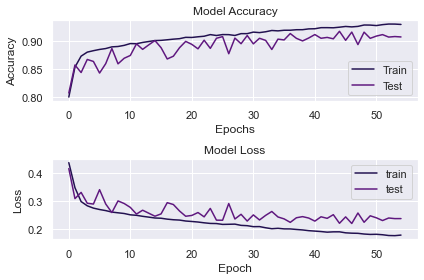

In [67]:
#Plotting Neural Network Training and validation
%matplotlib inline
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(NN_Classifier.history['accuracy'])
plt.plot(NN_Classifier.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(NN_Classifier.history['loss'])
plt.plot(NN_Classifier.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.tight_layout()

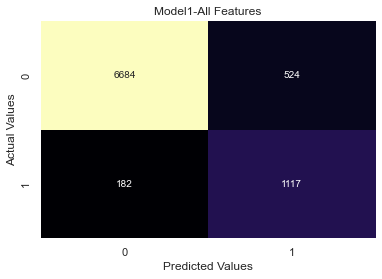

              precision    recall  f1-score   support

           0       0.97      0.93      0.95      7208
           1       0.68      0.86      0.76      1299

    accuracy                           0.92      8507
   macro avg       0.83      0.89      0.85      8507
weighted avg       0.93      0.92      0.92      8507



In [68]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score
#predicting the results
y_pred = (model.predict(X_test_clean_top_5_features) > 0.50).astype(int)
#validtion
metrics(y_test, y_pred, 'Model1-All Features')

In [69]:
pd.DataFrame(y_test).value_counts()

loan_status_labeled
0                      7208
1                      1299
dtype: int64